In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [24]:
data_df = pd.read_csv("../data/creditcard.csv")

In [25]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data preprocessing

In [31]:
# Check if there is any null value
data_df.isnull().values.any()

False

In [38]:
# Looking at data columns values' intervals

columns = data_df.columns

for column in data_df.columns:
    min_val, max_val = min(data_df[column]), max(data_df[column])
    print(f"Column: {column} - [{min_val}, {max_val}]")

Column: Time - [0.0, 172792.0]
Column: V1 - [-56.407509631329, 2.45492999121121]
Column: V2 - [-72.7157275629303, 22.0577289904909]
Column: V3 - [-48.3255893623954, 9.38255843282114]
Column: V4 - [-5.68317119816995, 16.8753440335975]
Column: V5 - [-113.74330671114599, 34.8016658766686]
Column: V6 - [-26.1605059358433, 73.3016255459646]
Column: V7 - [-43.5572415712451, 120.589493945238]
Column: V8 - [-73.21671845526741, 20.0072083651213]
Column: V9 - [-13.4340663182301, 15.5949946071278]
Column: V10 - [-24.5882624372475, 23.7451361206545]
Column: V11 - [-4.79747346479757, 12.018913181619899]
Column: V12 - [-18.683714633344298, 7.8483920756445995]
Column: V13 - [-5.7918812063208405, 7.126882958593759]
Column: V14 - [-19.2143254902614, 10.5267660517847]
Column: V15 - [-4.49894467676621, 8.87774159774277]
Column: V16 - [-14.1298545174931, 17.315111517627802]
Column: V17 - [-25.162799369324798, 9.25352625047285]
Column: V18 - [-9.498745921046769, 5.04106918541184]
Column: V19 - [-7.21352743

In [39]:
n = len(columns)
covariance_matrix = [[0 for _ in range(n)] for _ in range(n)]

for i in range(n):
    for j in range(i, n):
        X, Y = [data_df[columns[i]], data_df[columns[j]]]
        result = np.cov(X, Y)
        covariance_matrix[i][j] = result
        covariance_matrix[j][i] = result

In [44]:
covariance_matrix[0][2]

array([[ 2.25512401e+09, -8.30703107e+02],
       [-8.30703107e+02,  2.72682002e+00]])

In [47]:
data_df.cov()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,2.255124e+09,1.091960e+04,-8.307031e+02,-3.021425e+04,-7.077378e+03,1.134407e+04,-3.986868e+03,4.976739e+03,-2.095683e+03,-4.518322e+02,...,1.560435e+03,4.964595e+03,1.516599e+03,-4.654076e+02,-5.769855e+03,-9.482254e+02,-9.841860e+01,-1.475443e+02,-125860.970747,-24.300717
V1,1.091960e+04,3.836489e+00,-3.668399e-16,-1.591003e-15,-7.327817e-16,8.378639e-16,3.333094e-16,9.924436e-17,-5.408793e-17,8.332734e-17,...,-1.691534e-16,1.559269e-16,2.421982e-16,-5.106918e-17,-3.270723e-16,-1.284838e-16,9.270791e-17,2.291751e-16,-111.556566,-0.008244
V2,-8.307031e+02,-3.668399e-16,2.726820e+00,1.722431e-16,-5.294779e-16,1.705466e-16,8.324751e-16,-2.573168e-16,4.291109e-18,-1.894075e-16,...,8.721928e-17,2.080689e-16,9.431707e-17,-1.081634e-16,1.314776e-16,2.006343e-16,-3.456338e-16,-1.968671e-16,-219.485433,0.006260
V3,-3.021425e+04,-1.591003e-15,1.722431e-16,2.299029e+00,-4.621923e-16,-1.297100e-15,2.939634e-15,5.082718e-16,-5.758069e-17,2.412002e-16,...,-1.889959e-16,-2.348384e-16,-7.394678e-17,3.089224e-17,5.925223e-17,-1.715297e-16,3.409186e-16,3.703327e-16,-79.975549,-0.012150
V4,-7.077378e+03,-7.327817e-16,-5.294779e-16,-4.621923e-16,2.004684e+00,-3.576902e-15,-7.963000e-16,-1.949710e-16,1.121726e-15,9.433454e-16,...,-5.786136e-17,2.599239e-16,1.700352e-16,1.347708e-16,4.773297e-16,-2.689739e-16,-6.540199e-17,-4.341005e-18,34.964556,0.007846
V5,1.134407e+04,8.378639e-16,1.705466e-16,-1.297100e-15,-3.576902e-15,1.905081e+00,1.156005e-15,-1.397105e-18,8.149115e-16,8.041837e-16,...,-7.223938e-17,4.573025e-17,9.701149e-17,-8.131900e-16,-6.929392e-17,2.398717e-16,2.521276e-16,-8.280967e-17,-133.380790,-0.005444
V6,-3.986868e+03,3.333094e-16,8.324751e-16,2.939634e-15,-7.963000e-16,1.156005e-15,1.774946e+00,-5.304010e-17,-5.904266e-16,-1.975345e-16,...,-9.924436e-17,-1.017080e-16,3.371062e-17,-8.535315e-16,3.820521e-16,-1.645278e-16,-6.873882e-17,1.897350e-16,71.970931,-0.002415
V7,4.976739e+03,9.924436e-17,-2.573168e-16,5.082718e-16,-1.949710e-16,-1.397105e-18,-5.304010e-17,1.530401e+00,-5.867842e-17,3.567608e-17,...,3.142395e-17,-5.758880e-16,-2.145430e-16,-3.648690e-18,2.201688e-17,-4.844150e-16,-5.993831e-17,3.056168e-17,122.936845,-0.009620
V8,-2.095683e+03,-5.408793e-17,4.291109e-18,-5.758069e-17,1.121726e-15,8.149115e-16,-5.904266e-16,-5.867842e-17,1.426479e+00,5.726634e-16,...,3.613762e-17,1.493156e-17,1.519976e-16,-1.545859e-16,-1.134399e-16,-7.983458e-19,1.586213e-16,-2.243975e-16,-30.792991,0.000986
V9,-4.518322e+02,8.332734e-17,-1.894075e-16,2.412002e-16,9.433454e-16,8.041837e-16,-1.975345e-16,3.567608e-17,5.726634e-16,1.206992e+00,...,1.899876e-16,-1.223621e-16,-6.412962e-17,-1.877797e-16,1.144129e-16,-7.271184e-17,-7.746449e-17,2.986687e-16,-12.158248,-0.004459


## Class distribution visualization

In [5]:
class_frequency = data_csv["Class"].value_counts()

Text(0.5, 1.0, 'Distribution of the transaction class')

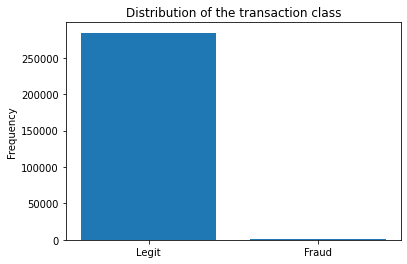

In [6]:
plt.bar(class_frequency.keys(), class_frequency)
plt.xticks([0, 1], ["Legit", "Fraud"])
plt.ylabel("Frequency")
plt.title("Distribution of the transaction class")

## Basic SVM classifier without data engineering

In [6]:
X = data_csv.loc[:, data_csv.columns != 'Class']
y = data_csv.loc[:, data_csv.columns == 'Class']

In [7]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [8]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.svm import SVC

model = SVC(gamma="auto", kernel="rbf")
model.fit(X_train, y_train)

/home/soubatn/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

## Visualising confusion matrix

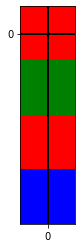

In [19]:
from matplotlib import colors

tn, fp, fn, tp = 1, 20, 2, 9

# create discrete colormap
cmap = colors.ListedColormap(['red', 'blue', "yellow", "green"])
bounds = [0,5,10,15,20]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow([[tn], [fp], [fn], [tp]], cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0, 1, 1));
ax.set_yticks(np.arange(0, 1, 1));

plt.show()